In [1]:
import pandas as pd

In [2]:
df_mcap = pd.read_csv("API_CM.MKT.LCAP.CD_DS2_en_csv_v2_3160134.csv")

In [3]:
df_mcap.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,Market capitalization of listed domestic compa...,CM.MKT.LCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Market capitalization of listed domestic compa...,CM.MKT.LCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,Market capitalization of listed domestic compa...,CM.MKT.LCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Africa Western and Central,AFW,Market capitalization of listed domestic compa...,CM.MKT.LCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4.841450e+10,NaN,9.242875e+10,7.447671e+10,6.246691e+10,NaN,NaN,NaN,NaN,7.314785e+10
4,Angola,AGO,Market capitalization of listed domestic compa...,CM.MKT.LCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [125]:
df_mcap_tmp = df_mcap.copy()
df_mcap_tmp = df_mcap_tmp.set_index("Country Name").drop(["Country Code","Indicator Name","Indicator Code"], 1).iloc[:,38:-1].stack().reset_index()
df_mcap_tmp.columns = ["item_id", "timestamp", "target_value"]
df_mcap_tmp.loc[:, "timestamp"] = df_mcap_tmp.loc[:, "timestamp"] + "-01-01"
df_mcap_tmp.timestamp = pd.to_datetime(df_mcap_tmp.timestamp)
df_mcap_tmp.index = pd.DatetimeIndex(df_mcap_tmp["timestamp"])
df_mcap_tmp

,item_id,timestamp,target_value
timestamp,,,
1998-01-01,Africa Eastern and Southern,1998-01-01,1.748050e+11
1999-01-01,Africa Eastern and Southern,1999-01-01,2.659810e+11
2000-01-01,Africa Eastern and Southern,2000-01-01,2.083840e+11
2001-01-01,Africa Eastern and Southern,2001-01-01,1.504710e+11
2004-01-01,Africa Eastern and Southern,2004-01-01,4.504940e+11
...,...,...,...
2005-01-01,Zambia,2005-01-01,2.516720e+09
2006-01-01,Zambia,2006-01-01,2.952560e+09
2011-01-01,Zambia,2011-01-01,3.184470e+09


In [33]:
countries_names_mapping = {
    "Congo, Rep." : "Democratic Republic of the Congo",
    "Czech Republic" : "Czechia",
    "Egypt, Arab Rep." : "Egypt",
    "Hong Kong SAR, China" : "Hong Kong",
    "Iran, Islamic Rep." : "Iran",
    "Korea, Dem. People's Rep." : "North Korea",
    "Korea, Rep." : "South Korea",
    "Lao PDR" : "Laos",
    "West Bank and Gaza" : "Palestine",
    "Russian Federation" : "Russia",
    "Slovak Republic" : "Slovakia",
    "Syrian Arab Republic" : "Syria",
    "Venezuela, RB" : "Venezuela",
    "Yemen, Rep." : "Yemen"
}

In [126]:
for k in countries_names_mapping:
    print(k)
    df_mcap_tmp.loc[df_mcap_tmp["item_id"] == k, "item_id"] = countries_names_mapping[k]

Congo, Rep.
Czech Republic
Egypt, Arab Rep.
Hong Kong SAR, China
Iran, Islamic Rep.
Korea, Dem. People's Rep.
Korea, Rep.
Lao PDR
West Bank and Gaza
Russian Federation
Slovak Republic
Syrian Arab Republic
Venezuela, RB
Yemen, Rep.


In [7]:
df_eci = pd.read_csv("eci_hs6_hs96.csv")

In [67]:
df_eci_tmp = df_eci.copy()
df_eci_tmp = df_eci_tmp.set_index("Country").drop("Country ID", 1).stack().reset_index()
df_eci_tmp.columns = ["item_id", "timestamp", "eci"]
df_eci_tmp.loc[:, "timestamp"] = df_eci_tmp.loc[:, "timestamp"] + "-01-01"
df_eci_tmp.timestamp = pd.to_datetime(df_eci_tmp.timestamp)
df_eci_tmp.index = pd.DatetimeIndex(df_eci_tmp.timestamp)
df_eci_tmp

,item_id,timestamp,eci
timestamp,,,
1998-01-01,Angola,1998-01-01,-1.733082
1999-01-01,Angola,1999-01-01,-2.109911
2000-01-01,Angola,2000-01-01,-1.940937
2001-01-01,Angola,2001-01-01,-2.339813
2002-01-01,Angola,2002-01-01,-2.398575
...,...,...,...
2015-01-01,Venezuela,2015-01-01,-0.356084
2016-01-01,Venezuela,2016-01-01,-0.606662
2017-01-01,Venezuela,2017-01-01,-0.580987


In [87]:
df_eci_tmp_advanced = df_eci_tmp.copy()
df_eci_tmp_advanced.timestamp = df_eci_tmp_advanced.timestamp.apply(lambda x: x.replace(year=x.year+5))

In [131]:
import matplotlib.pyplot as plt 

def plot_eci_mcap(country):
    fig, ax = plt.subplots()
    ax.plot(df_mcap_tmp[df_mcap_tmp["item_id"]== country].timestamp, df_mcap_tmp[df_mcap_tmp["item_id"]== country].target_value, color='blue')
    ax.tick_params(axis='y', labelcolor='blue')
    ax2 = ax.twinx()
    ax2.plot(df_eci_tmp[df_eci_tmp["item_id"]== country].timestamp, df_eci_tmp_advanced[df_eci_tmp["item_id"]== country].eci, color='green')
    ax2.tick_params(axis='y', labelcolor='green')
    plt.show()

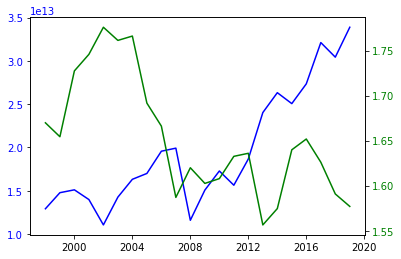

In [132]:
plot_eci_mcap("United States")

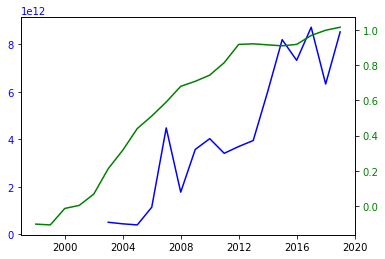

In [133]:
plot_eci_mcap("China")

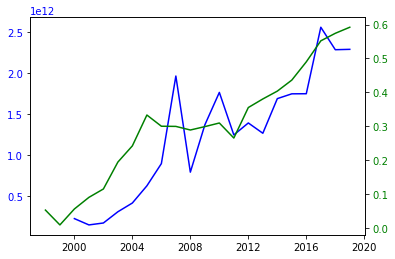

In [134]:
plot_eci_mcap("India")

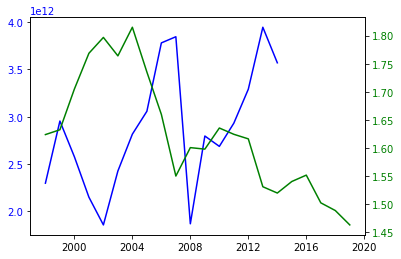

In [136]:
plot_eci_mcap("United Kingdom")

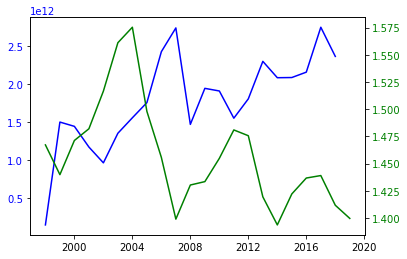

In [137]:
plot_eci_mcap("France")

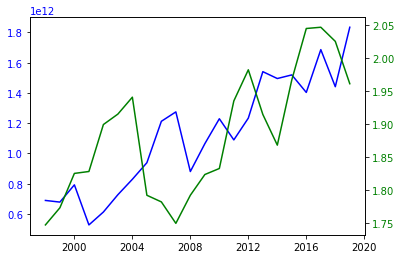

In [138]:
plot_eci_mcap("Switzerland")

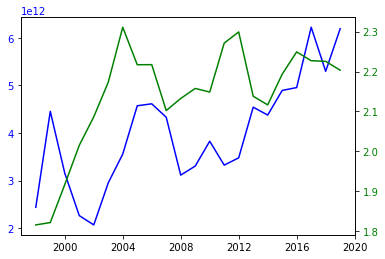

In [139]:
plot_eci_mcap("Japan")

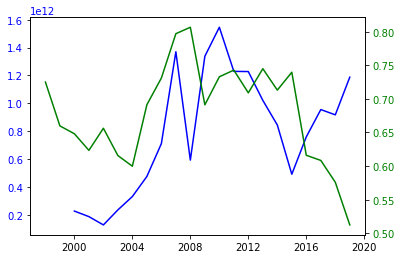

In [140]:
plot_eci_mcap("Brazil")

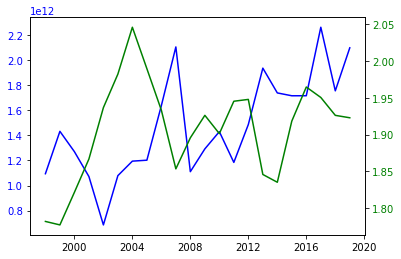

In [142]:
plot_eci_mcap("Germany")

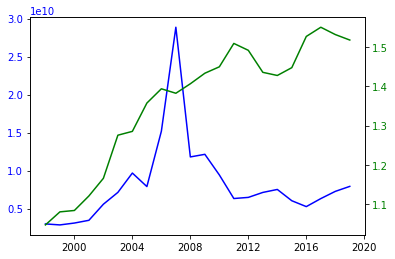

In [148]:
plot_eci_mcap("Slovenia")

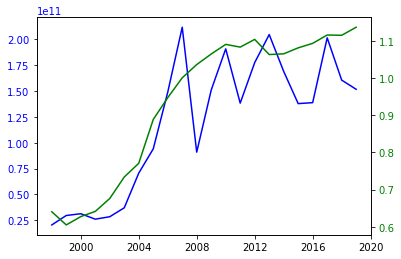

In [149]:
plot_eci_mcap("Poland")

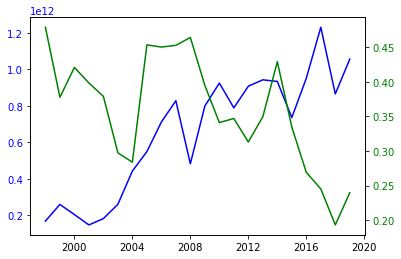

In [150]:
plot_eci_mcap("South Africa")

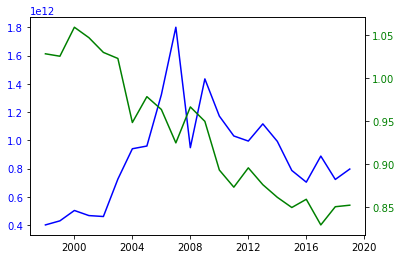

In [152]:
plot_eci_mcap("Spain")

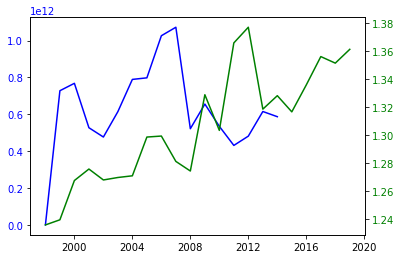

In [153]:
plot_eci_mcap("Italy")

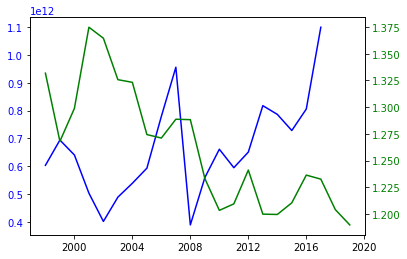

In [156]:
plot_eci_mcap("Netherlands")

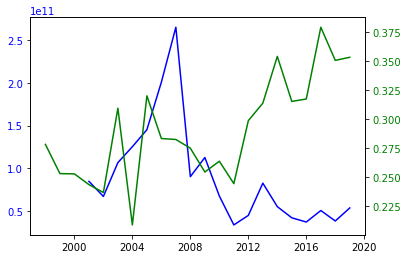

In [157]:
plot_eci_mcap("Greece")

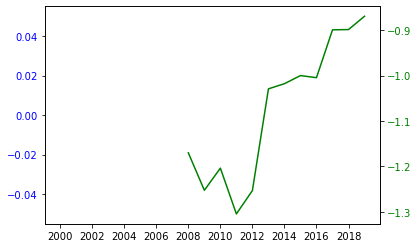

In [164]:
plot_eci_mcap("Laos")

In [11]:
df_eci_tmp.to_csv("df_eci.csv", index=False)
df_mcap_tmp.to_csv("df_mcap.csv", index=False)